In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import scipy.io
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
data = scipy.io.loadmat('data/ex3data1.mat')
X = data['X']
y = data['y']

m = X.shape[0]
n = X.shape[1]

In [3]:
X = np.hstack((np.ones((m, 1)), X))

In [4]:
labels_count = len(np.unique(y))

In [5]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

In [6]:
dim = 10

sample = X[:, 1:][np.random.randint(m, size = dim * dim)]

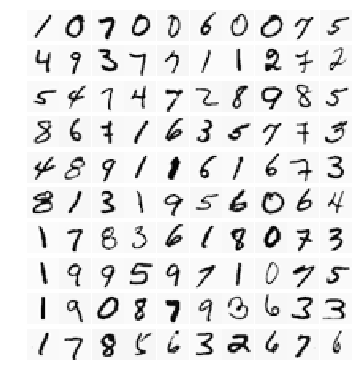

In [7]:
fig = plt.figure(figsize= (5, 5))
gs = gridspec.GridSpec(dim, dim)
gs.update(left = 0.01, right = 0.91, bottom = 0.01, top = 0.99, wspace = 0.05, hspace = 0.05)

k = 0
for i in range(dim):
    for j in range(dim):
        ax = plt.subplot(gs[i, j])
        ax.axis('off')
        ax.imshow(sample[k].reshape(int(np.sqrt(n)), int(np.sqrt(n))).T, cmap=plt.get_cmap('Greys'), interpolation='nearest')
        k += 1

In [8]:
lam = 1
theta_0 = np.zeros(n + 1)

In [9]:
def cost_function(theta, X, y, m, lam):
    J = 0
    h = sigmoid(np.dot(X, theta))
    J = -(1 / m) * (y.T.dot(np.log(h)) - (1 - y.T).dot(np.log(1 - h)) + lam / (2 * m) * np.sum(theta[1:]) ** 2)
    grad = (1 / m) * (h - y).dot(X) + lam / m * np.array([0, *theta[1:]])
    return J, grad

In [10]:
cost_0, _ = cost_function(theta_0, X, y.ravel(), m, lam)

print('Cost at initial theta (zeros): %.3f' % cost_0)

Cost at initial theta (zeros): -152.770


In [11]:
_

array([-5.00000000e+00,  0.00000000e+00,  0.00000000e+00, -7.74530186e-08,
        3.19876600e-06,  1.89536237e-05, -7.06376094e-04, -8.97395355e-04,
       -3.72741263e-04, -1.10787541e-04, -1.37049401e-04, -4.11905416e-05,
        3.09307938e-05,  7.56273049e-05,  1.66101324e-04,  1.88959823e-04,
        1.11618541e-04,  3.44740605e-05,  2.31849497e-07, -3.65944989e-07,
        0.00000000e+00, -2.71480120e-07,  2.68348312e-06,  1.35802658e-06,
        5.10971729e-05,  9.29459372e-05, -1.13518367e-03, -4.04630781e-03,
       -5.65616107e-03, -4.38249876e-03, -1.22936584e-03,  1.06402725e-03,
        1.67724463e-03,  1.83122226e-03,  1.41359436e-03,  1.00669534e-03,
        6.22600175e-04,  2.88468971e-04,  1.69300222e-04,  4.53328568e-05,
        1.64277642e-05,  2.32894093e-06, -2.61429416e-05,  6.07579192e-05,
       -2.68789968e-04, -2.19152610e-03, -1.11673884e-02, -2.41869621e-02,
       -3.12963830e-02, -2.35164217e-02, -1.04915336e-02, -4.58342103e-03,
       -2.20552420e-03, -

In [12]:
y_1_hot = (y == 1).astype('float')

In [13]:
res = minimize(cost_function, theta_0, args = (X, y_1_hot, m, lam), method = None, jac = True)

ValueError: shapes (401,401) and (5000,401) not aligned: 401 (dim 1) != 5000 (dim 0)

In [121]:
theta = res['x']

print('Cost at best-fit theta: %.3f' % res['fun'])

Cost at best-fit theta: 0.028


In [122]:
def one_vs_all(theta_0, X, y, m, n, labels_count, lam):
    all_theta = np.zeros((labels_count, n + 1))
    for i in range(1, labels_count + 1):
        y_i_hot = (y == i).astype(np.float64)
        res = minimize(cost_function, theta_0, args = (X, y_i_hot, m, lam), method = None, jac = True)
        all_theta[i - 1] = res['x']
    return all_theta

In [123]:
all_theta = one_vs_all(theta_0, X, y, m, n, labels_count, lam)

In [124]:
def prediction(all_theta, X):
    return sigmoid(all_theta.dot(X.T)).T.argmax(axis = 1) + 1

def accuracy(all_theta, X, y, m):
    return np.mean(prediction(all_theta, X) == y)

In [127]:
print('Train Accuracy: %.4f' % accuracy(all_theta, X, y, m))

Train Accuracy: 0.9348


In [130]:
weights = scipy.io.loadmat('data/ex3weights.mat')

In [133]:
theta_1 = weights['Theta1']
theta_2 = weights['Theta2']

In [136]:
a_1 = X.T

a_2 = sigmoid(theta_1.dot(a_1))
a_2 = np.vstack((np.ones(m), a_2))

a_3 = sigmoid(theta_2.dot(a_2))

In [141]:
def predict_nn(out):
    return out.argmax(axis = 0) + 1

def accuracy_nn(out):
    return np.mean(predict_nn(out) == y) * 100

In [143]:
print('Training set accuracy: %.3f' % accuracy_nn(a_3))


Training set accuracy: 97.520


In [165]:
predict_nn(a_3)

array([10, 10, 10, ...,  9,  9,  9])

In [186]:
train_ex_num = np.random.randint(m)
train_ex = X[train_ex_num][1:]
train_ex = train_ex.reshape((20, 20)).T[::-1].flatten()

print(predict_nn(train_ex))
# print(train_ex)

269
